In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

In [2]:
garch_prediction_path = 'Files/GARCH/garch_predictions.csv'

## OIL spot return data 불러오기

In [3]:
import requests

api_key = '2LMFTJQ7V0USVG0B'

params = {
    'function': 'WTI',
    'interval': 'daily',
    'apikey': api_key
}

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=WTI&interval=monthly&apikey=demo'
r = requests.get(url, params=params)
data = r.json()

In [4]:
SP = pd.DataFrame(columns=['date', 'price'])
for i in range(len(data['data'])):
    SP.loc[i, 'date'] = data['data'][i]['date']
    SP.loc[i, 'price'] = data['data'][i]['value']
SP.index = pd.to_datetime(SP['date'])
SP.drop(columns='date', inplace=True)
SP.sort_index(inplace=True)
SP['price'] = pd.to_numeric(SP['price'], errors='coerce')
SP = SP.dropna()

In [5]:
SP['return'] = SP['price'].pct_change().apply(lambda x: np.log(1 + x))

In [6]:
SP_month_return = SP['return'].dropna()

In [7]:
SP_month_return = SP_month_return 

# ROLLING WINDOW로 예측

In [8]:
# 학습할 데이터 가져오기 
SP_spot = pd.read_csv('../../Database/spot_std/SP_vol.csv')

In [9]:
origin_data_index = SP_spot.index

In [10]:
SP_month_return = SP_month_return[SP_spot.date.values] 

In [11]:
am = arch_model(SP_month_return, vol='Garch', p=1,o=0,q=1, dist='Normal',rescale=False)
res = am.fit(update_freq = 5)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -9662.104275955877
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2


In [34]:
df = res.conditional_volatility[(res.conditional_volatility.index>'1999-04-30')]

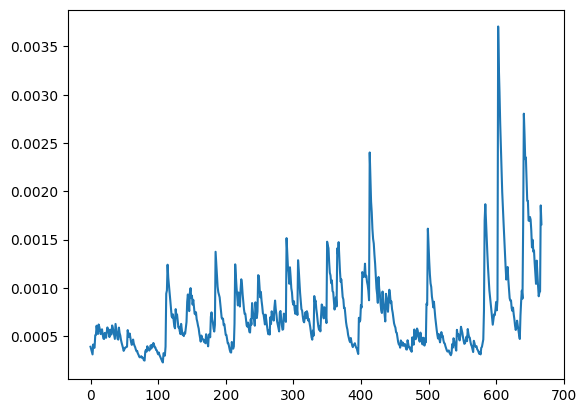

In [36]:
plt.plot(df.values**2)

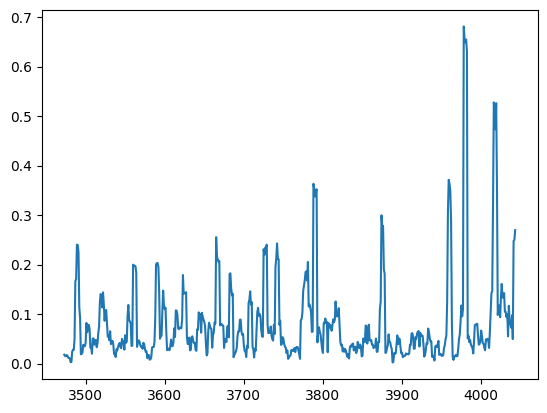

In [18]:
plt.plot(SP_spot['return'][3473:])

In [17]:
SP_spot[3474:]

,date,return,종가
3474,1999-09-21,0.015476,1.205
3475,1999-09-22,0.015102,1.211
3476,1999-09-23,0.017456,1.213
3477,1999-09-24,0.016218,1.213
3478,1999-09-27,0.011955,1.216
...,...,...,...
4039,2001-12-20,0.097781,0.867
4040,2001-12-21,0.049713,0.869
4041,2001-12-26,0.247830,0.869
4042,2001-12-27,0.250078,0.871


In [16]:
SP_spot

,date,return,종가
0,1986-01-09,0.028227,0.9145
1,1986-01-10,0.026726,0.9195
2,1986-01-13,0.028682,0.9175
3,1986-01-14,0.015585,0.9170
4,1986-01-15,0.016976,0.9125
...,...,...,...
4039,2001-12-20,0.097781,0.8670
4040,2001-12-21,0.049713,0.8690
4041,2001-12-26,0.247830,0.8690
4042,2001-12-27,0.250078,0.8710
